# Omdena  - Milan Chapter Agrifoods
## AI for Sustainable agri-food systems: use of Satellite Imagery
### Data Exploration and model for grapes_olives in Italy 2006-2021
#### Author: Maria Fisher 


The main objective of this study is to have gather information about crop production in Italy for the period of 2006-2022. 

Crop dataset used in this study was downloaded from the Italian National Institute of Statistics (Istat).



In [1]:
import warnings 
warnings.filterwarnings("ignore")

import os
import pandas as pd
pd.options.display.float_format = "{:.2f}".format
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns 
import scipy 
import sklearn
import geopandas as gpd
import pgeocode
import folium
import sys
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot

In [2]:
grapes_olives = pd.read_csv('final_data_notebooks/grapes-olives_final_2006-2021.csv',skipinitialspace=True)
grapes_olives.head()

City             Type_crop  Year  production_tonnes  total_area_ha  \
0  Agrigento  Grapes for table use  2006          141750.00        6770.00   
1  Agrigento  Grapes for table use  2006          141750.00        6770.00   
2  Agrigento  Grapes for table use  2006          141750.00        6770.00   
3  Agrigento  Grapes for table use  2006          141750.00        6770.00   
4  Agrigento  Grapes for table use  2006          141750.00        6770.00   

   Unnamed: 0.1  Unnamed: 0    PS    TS  QV2M  ...  T2M_MIN  GWETPROF  \
0        603.00        6.00 96.87 16.70  8.33  ...     6.77      0.61   
1        603.00        6.00 96.87 16.70  8.33  ...     6.77      0.61   
2        603.00        6.00 96.87 16.70  8.33  ...     6.77      0.61   
3        603.00        6.00 96.87 16.70  8.33  ...     6.77      0.61   
4        603.00        6.00 96.87 16.70  8.33  ...     6.77      0.61   

   GWETROOT  CLOUD_AMT  T2M_RANGE  PRECTOTCORR     Type_fertilizer  \
0      0.62      39.63      21.74         1.58   calcium cyanamide   
1      0.62      39.63      21.74         1.58  nitrogen-potassium   
2      0.62      39.63      21.74         1.58         peaty-amend   
3      0.62      39.63      21.74         1.58    organic-nitrogen   
4      0.62      39.63      21.74         1.58             organic   

   Fertilizers_tonnes   lat   lon  
0                0.00 37.31 13.58  
1               27.70 37.31 13.58  
2              174.50 37.31 13.58  
3              760.50 37.31 13.58  
4             1343.70 37.31 13.58  

[5 rows x 24 columns]

In [3]:
grapes_olives = grapes_olives.drop(columns =[ 'Unnamed: 0.1','Unnamed: 0'])
grapes_olives

City             Type_crop  Year  production_tonnes  \
0         Agrigento  Grapes for table use  2006          141750.00   
1         Agrigento  Grapes for table use  2006          141750.00   
2         Agrigento  Grapes for table use  2006          141750.00   
3         Agrigento  Grapes for table use  2006          141750.00   
4         Agrigento  Grapes for table use  2006          141750.00   
...             ...                   ...   ...                ...   
51952  Sud Sardegna          table olives  2021            4573.30   
51953  Sud Sardegna          table olives  2021            4573.30   
51954  Sud Sardegna          table olives  2021            4573.30   
51955  Sud Sardegna          table olives  2021            4573.30   
51956  Sud Sardegna          table olives  2021            4573.30   

       total_area_ha     PS    TS  QV2M  RH2M  WS2M  ...  T2M_MIN  GWETPROF  \
0            6770.00  96.87 16.70  8.33 71.95  2.61  ...     6.77      0.61   
1            6770.00  96.87 16.70  8.33 71.95  2.61  ...     6.77      0.61   
2            6770.00  96.87 16.70  8.33 71.95  2.61  ...     6.77      0.61   
3            6770.00  96.87 16.70  8.33 71.95  2.61  ...     6.77      0.61   
4            6770.00  96.87 16.70  8.33 71.95  2.61  ...     6.77      0.61   
...              ...    ...   ...   ...   ...   ...  ...      ...       ...   
51952        2534.00 100.92 19.17 10.55 76.47  4.35  ...    13.52      0.56   
51953        2534.00 100.92 19.17 10.55 76.47  4.35  ...    13.52      0.56   
51954        2534.00 100.92 19.17 10.55 76.47  4.35  ...    13.52      0.56   
51955        2534.00 100.92 19.17 10.55 76.47  4.35  ...    13.52      0.56   
51956        2534.00 100.92 19.17 10.55 76.47  4.35  ...    13.52      0.56   

       GWETROOT  CLOUD_AMT  T2M_RANGE  PRECTOTCORR     Type_fertilizer  \
0          0.62      39.63      21.74         1.58   calcium cyanamide   
1          0.62      39.63      21.74         1.58  nitrogen-potassium   
2          0.62      39.63      21.74         1.58         peaty-amend   
3          0.62      39.63      21.74         1.58    organic-nitrogen   
4          0.62      39.63      21.74         1.58             organic   
...         ...        ...        ...          ...                 ...   
51952      0.58      49.54      10.26         2.78  nitrogen-potassium   
51953      0.58      49.54      10.26         2.78    organic-nitrogen   
51954      0.58      49.54      10.26         2.78             organic   
51955      0.58      49.54      10.26         2.78         peaty-amend   
51956      0.58      49.54      10.26         2.78         peaty-amend   

       Fertilizers_tonnes   lat   lon  
0                    0.00 37.31 13.58  
1                   27.70 37.31 13.58  
2                  174.50 37.31 13.58  
3                  760.50 37.31 13.58  
4                 1343.70 37.31 13.58  
...                   ...   ...   ...  
51952              113.00  0.00  0.00  
51953              221.00  0.00  0.00  
51954                0.00  0.00  0.00  
51955                0.00  0.00  0.00  
51956                0.00  0.00  0.00  

[51957 rows x 22 columns]

## Pre-processing dataset 

In [4]:
def show_info(grapes_olives):
    print('DATASET SHAPE: ', grapes_olives.shape, '\n')
    print('-'*50)
    print('FEATURE DATA TYPES:')
    print(grapes_olives.info())
    print('\n', '-'*50)
    print('NUMBER OF UNIQUE VALUES PER FEATURE:', '\n')
    print(grapes_olives.nunique())
    print('\n', '-'*50)
    print('NULL VALUES PER FEATURE')
    print(grapes_olives.isnull().sum())
show_info(grapes_olives)

DATASET SHAPE:  (51957, 22) 

--------------------------------------------------
FEATURE DATA TYPES:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51957 entries, 0 to 51956
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                51957 non-null  object 
 1   Type_crop           51957 non-null  object 
 2   Year                51957 non-null  int64  
 3   production_tonnes   51957 non-null  float64
 4   total_area_ha       51957 non-null  float64
 5   PS                  51957 non-null  float64
 6   TS                  51957 non-null  float64
 7   QV2M                51957 non-null  float64
 8   RH2M                51957 non-null  float64
 9   WS2M                51957 non-null  float64
 10  GWETTOP             51957 non-null  float64
 11  T2M_MAX             51957 non-null  float64
 12  T2M_MIN             51957 non-null  float64
 13  GWETPROF            51957 non-null  float64
 14  G

In [5]:
grapes_olives.describe()

Year  production_tonnes  total_area_ha       PS       TS     QV2M  \
count 51957.00           51957.00       51957.00 51957.00 51957.00 51957.00   
mean   2014.82           22937.22        1337.79    94.30    14.36     7.69   
std       4.94           57960.10        6147.33    18.43     4.04     1.73   
min    2006.00               0.00           0.00     0.00     0.00     0.00   
25%    2010.00             263.60           0.00    95.87    12.80     7.25   
50%    2015.00            2700.00           0.00    98.48    15.11     7.91   
75%    2020.00           16710.30          65.00    99.54    17.08     8.55   
max    2021.00          721450.00       98900.00   101.70    20.32    10.60   

          RH2M     WS2M  GWETTOP  T2M_MAX  T2M_MIN  GWETPROF  GWETROOT  \
count 51957.00 51957.00 51957.00 51957.00 51957.00  51957.00  51957.00   
mean     70.04     2.20     0.61    24.37     5.35      0.60      0.61   
std      13.80     0.93     0.14     5.29     3.84      0.14      0.14   
min       0.00     0.00     0.00     0.00    -8.91      0.00      0.00   
25%      70.55     1.54     0.56    23.58     2.76      0.57      0.58   
50%      72.33     2.10     0.62    25.39     5.36      0.62      0.63   
75%      74.50     2.68     0.69    26.83     8.01      0.67      0.68   
max      82.11     4.70     0.89    30.90    14.27      0.85      0.80   

       CLOUD_AMT  T2M_RANGE  PRECTOTCORR  Fertilizers_tonnes      lat      lon  
count   51957.00   51957.00     51957.00            51957.00 51957.00 51957.00  
mean       49.36      19.02         2.05             1613.08    41.85    12.23  
std        11.68       5.01         0.75             4091.50     5.67     3.05  
min         0.00       0.00         0.00                0.00     0.00     0.00  
25%        45.56      17.33         1.60               29.40    40.64    10.10  
50%        51.05      20.54         2.02              231.80    42.77    12.39  
75%        55.81      22.19         2.44             1200.90    44.80    14.33  
max        74.69      26.54         4.99            98671.60    46.17    18.17

## Total grapes_olives production in 2006-2021

In [6]:
plt.figure(figsize= (10,5))
sns.barplot(x= 'Year', y= 'production_tonnes',data = grapes_olives,palette='coolwarm')
plt.title('Total grapes olives production 2006-2021')
plt.xlabel('Year')
plt.ylabel('Total production (tonnes)')
plt.show()



## Cereal production by Cities 

In [7]:
grapes_olives_region = grapes_olives.groupby(by = grapes_olives.City)['production_tonnes','City'].sum().reset_index().sort_values(by = 'production_tonnes', ascending = False).head(10)
grapes_olives_region

City  production_tonnes
97                 Treviso       125995534.00
33                  Foggia        76901643.00
92                 Taranto        68453236.00
7                     Bari        66691728.00
105                 Verona        51877480.00
96                 Trapani        49076189.00
23                  Chieti        46416297.00
78                 Ravenna        40578071.00
8    Barletta-Andria-Trani        38814674.00
0                Agrigento        36389223.00

In [8]:
plt.figure(figsize= (10,5))
sns.barplot(x=grapes_olives_region['production_tonnes'],y= grapes_olives_region['City'], orient='h', palette='coolwarm');
plt.title('Total grapes olives production 2006-2021 by City')
plt.xlabel('Total production')
plt.ylabel('Cities')
plt.show()

## grapes_olives highest production 2006-2021

In [9]:
print(grapes_olives.Type_crop.max())
print(grapes_olives.Type_crop.value_counts())
print(grapes_olives.Type_crop.nunique())



wine
olive oil                                                        15168
wine                                                             15057
Grapes for table use                                             10279
grapes for other wines n.e.c. (without pdo/pgi)                   2140
oil olives                                                        2010
other olives                                                      2010
grapes for wines with protected designation of origin (pdo)       1980
grapes for wines with protected geographical indication (pgi)     1880
table olives                                                      1170
0                                                                  123
grapes for other purposes n.e.c.                                   120
grapes for raisins                                                  20
Name: Type_crop, dtype: int64
12


In [10]:
grapes_olives = grapes_olives[grapes_olives.Type_crop != '0']
print(grapes_olives.Type_crop.value_counts())

olive oil                                                        15168
wine                                                             15057
Grapes for table use                                             10279
grapes for other wines n.e.c. (without pdo/pgi)                   2140
oil olives                                                        2010
other olives                                                      2010
grapes for wines with protected designation of origin (pdo)       1980
grapes for wines with protected geographical indication (pgi)     1880
table olives                                                      1170
grapes for other purposes n.e.c.                                   120
grapes for raisins                                                  20
Name: Type_crop, dtype: int64


In [11]:
grapes_olives = grapes_olives.replace('Grapes for table use','grapes-table')
grapes_olives = grapes_olives.replace('grapes for other purposes n.e.c.','grapes-n.e.c')
grapes_olives = grapes_olives.replace('grapes for raisins','grapes-raisins')
grapes_olives = grapes_olives.replace('grapes for other wines n.e.c. (without pdo/pgi)','grapes-wines(N-pdo/pgi)')
grapes_olives = grapes_olives.replace('grapes for wines with protected designation of origin (pdo)','grapes-wines(Y-pdo)')
grapes_olives = grapes_olives.replace('grapes for wines with protected geographical indication (pgi)','grapes-wines(Y-pgi)')

In [12]:
print(grapes_olives.total_area_ha.max())
print(grapes_olives.total_area_ha.min())
print(grapes_olives.total_area_ha.value_counts())
print(grapes_olives.total_area_ha.nunique())


98900.0
0.0
0.00       30235
5.00         640
3.00         550
6.00         510
12.00        460
           ...  
174.00        10
3635.00       10
780.00        10
3840.00       10
6770.00       10
Name: total_area_ha, Length: 608, dtype: int64
608


In [13]:
grapes_olives.drop(grapes_olives[grapes_olives['total_area_ha'] == 0.00 ].index , inplace=True)

In [14]:
grapes_olives.describe().astype(int)

Year  production_tonnes  total_area_ha     PS     TS   QV2M   RH2M  \
count  21599              21599          21599  21599  21599  21599  21599   
mean    2017              20292           3218     94     14      7     69   
std        4              56364           9211     17      3      1     12   
min     2006                  0              1      0      0      0      0   
25%     2014                155             20     96     13      7     70   
50%     2020               1250            190     98     15      8     71   
75%     2021              12657           2017     99     17      8     73   
max     2021             721450          98900    101     20     10     81   

        WS2M  GWETTOP  T2M_MAX  T2M_MIN  GWETPROF  GWETROOT  CLOUD_AMT  \
count  21599    21599    21599    21599     21599     21599      21599   
mean       2        0       24        5         0         0         48   
std        0        0        5        3         0         0         11   
min        0        0        0       -5         0         0          0   
25%        1        0       23        3         0         0         44   
50%        2        0       25        5         0         0         50   
75%        2        0       27        8         0         0         55   
max        4        0       30       14         0         0         74   

       T2M_RANGE  PRECTOTCORR  Fertilizers_tonnes    lat    lon  
count      21599        21599               21599  21599  21599  
mean          19            1                1550     41     12  
std            4            0                3970      6      3  
min            0            0                   0      0      0  
25%           17            1                  29     40     10  
50%           20            1                 217     42     12  
75%           22            2                1160     44     14  
max           26            4               98671     46     18

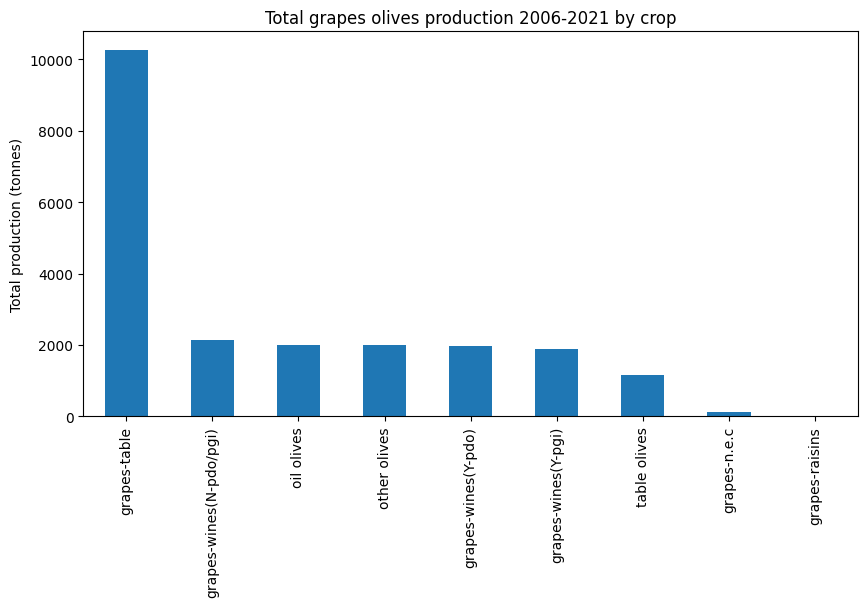

In [15]:
plt.figure(figsize=(10,5))
grapes_olives['Type_crop'].value_counts().plot.bar()
plt.title('Total grapes olives production 2006-2021 by crop')
plt.ylabel('Total production (tonnes)')
plt.show()


## Subseting data

In [16]:
grapes_olives

City     Type_crop  Year  production_tonnes  total_area_ha  \
0         Agrigento  grapes-table  2006          141750.00        6770.00   
1         Agrigento  grapes-table  2006          141750.00        6770.00   
2         Agrigento  grapes-table  2006          141750.00        6770.00   
3         Agrigento  grapes-table  2006          141750.00        6770.00   
4         Agrigento  grapes-table  2006          141750.00        6770.00   
...             ...           ...   ...                ...            ...   
51952  Sud Sardegna  table olives  2021            4573.30        2534.00   
51953  Sud Sardegna  table olives  2021            4573.30        2534.00   
51954  Sud Sardegna  table olives  2021            4573.30        2534.00   
51955  Sud Sardegna  table olives  2021            4573.30        2534.00   
51956  Sud Sardegna  table olives  2021            4573.30        2534.00   

          PS    TS  QV2M  RH2M  WS2M  ...  T2M_MIN  GWETPROF  GWETROOT  \
0      96.87 16.70  8.33 71.95  2.61  ...     6.77      0.61      0.62   
1      96.87 16.70  8.33 71.95  2.61  ...     6.77      0.61      0.62   
2      96.87 16.70  8.33 71.95  2.61  ...     6.77      0.61      0.62   
3      96.87 16.70  8.33 71.95  2.61  ...     6.77      0.61      0.62   
4      96.87 16.70  8.33 71.95  2.61  ...     6.77      0.61      0.62   
...      ...   ...   ...   ...   ...  ...      ...       ...       ...   
51952 100.92 19.17 10.55 76.47  4.35  ...    13.52      0.56      0.58   
51953 100.92 19.17 10.55 76.47  4.35  ...    13.52      0.56      0.58   
51954 100.92 19.17 10.55 76.47  4.35  ...    13.52      0.56      0.58   
51955 100.92 19.17 10.55 76.47  4.35  ...    13.52      0.56      0.58   
51956 100.92 19.17 10.55 76.47  4.35  ...    13.52      0.56      0.58   

       CLOUD_AMT  T2M_RANGE  PRECTOTCORR     Type_fertilizer  \
0          39.63      21.74         1.58   calcium cyanamide   
1          39.63      21.74         1.58  nitrogen-potassium   
2          39.63      21.74         1.58         peaty-amend   
3          39.63      21.74         1.58    organic-nitrogen   
4          39.63      21.74         1.58             organic   
...          ...        ...          ...                 ...   
51952      49.54      10.26         2.78  nitrogen-potassium   
51953      49.54      10.26         2.78    organic-nitrogen   
51954      49.54      10.26         2.78             organic   
51955      49.54      10.26         2.78         peaty-amend   
51956      49.54      10.26         2.78         peaty-amend   

       Fertilizers_tonnes   lat   lon  
0                    0.00 37.31 13.58  
1                   27.70 37.31 13.58  
2                  174.50 37.31 13.58  
3                  760.50 37.31 13.58  
4                 1343.70 37.31 13.58  
...                   ...   ...   ...  
51952              113.00  0.00  0.00  
51953              221.00  0.00  0.00  
51954                0.00  0.00  0.00  
51955                0.00  0.00  0.00  
51956                0.00  0.00  0.00  

[21599 rows x 22 columns]

In [17]:
Q1 = grapes_olives.quantile(0.25)
Q3 = grapes_olives.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year                     7.00
production_tonnes    12502.50
total_area_ha         1997.00
PS                       3.52
TS                       4.33
QV2M                     1.31
RH2M                     3.39
WS2M                     1.10
GWETTOP                  0.13
T2M_MAX                  3.22
T2M_MIN                  5.14
GWETPROF                 0.11
GWETROOT                 0.10
CLOUD_AMT               10.90
T2M_RANGE                4.87
PRECTOTCORR              0.82
Fertilizers_tonnes    1130.90
lat                      4.07
lon                      4.41
dtype: float64


In [18]:
# Remove outliers
grapes_olives = grapes_olives[~((grapes_olives < (Q1 - 1.5 * IQR)) | (grapes_olives > (Q3 + 1.5 * IQR))).any(axis=1)]
print(grapes_olives.shape)


(13223, 22)


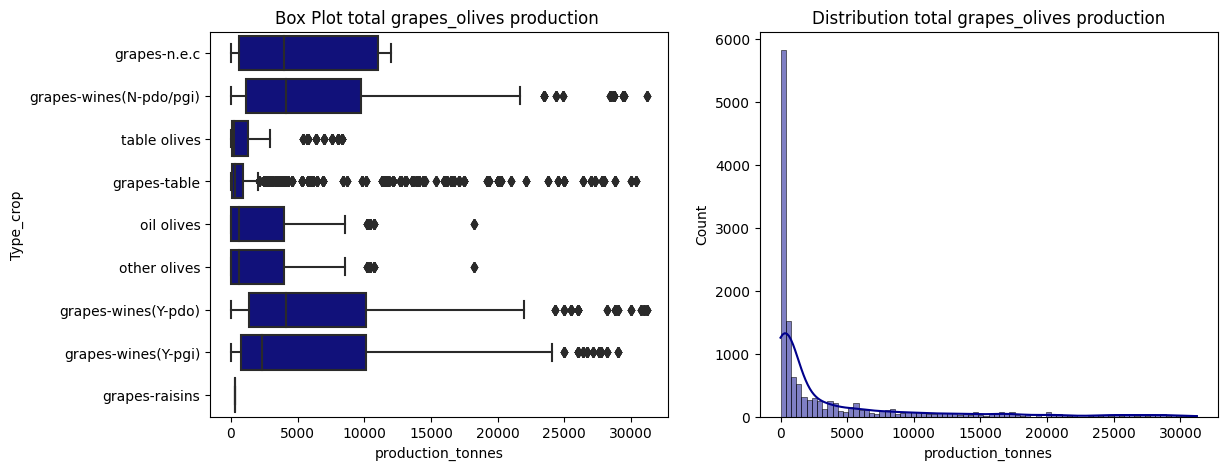

In [19]:
#Box plot and histplot (crop production distribuition)

plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
sns.boxplot(data=grapes_olives, x='production_tonnes', y="Type_crop",  color = 'darkblue', dodge=False)

plt.title(f'Box Plot total grapes_olives production ')

plt.subplot(1,2,2)
sns.histplot(data=grapes_olives, x= 'production_tonnes',  color = 'darkblue', kde=True, bins = 80)
plt.title(f'Distribution total grapes_olives production')

plt.show()



In [20]:
#Box plot and histplot of total area(ha)

plt.figure(figsize=(15,3))

plt.subplot(1,2,1)
sns.boxplot(data=grapes_olives, x='Year', y="total_area_ha",  color = 'darkblue', dodge=False)

plt.title(f'Box Plot total area (ha)')

plt.subplot(1,2,2)
sns.histplot(data=grapes_olives, x= 'total_area_ha',  color = 'darkblue', kde=True, bins = 80)
plt.title(f'Distribution total total area (ha)')

plt.show()

In [21]:
print(grapes_olives.total_area_ha.max())
print(grapes_olives.total_area_ha.min())


5010.0
1.0


In [56]:
print(grapes_olives.Fertilizers_tonnes.max())

2852.7


In [22]:
fig, ax = plt.subplots(3,1, sharex=True, figsize=(8,8))

grapes_olives['Year'] = (grapes_olives['Year']).astype(str)

# Total crop production
crops = grapes_olives[['Year', 'production_tonnes']]
crops = crops.groupby('Year').mean()
sns.lineplot(data= crops, x="Year", y="production_tonnes", ax=ax[0])

# Total area
crops = grapes_olives[['Year', 'total_area_ha']]
crops = crops.groupby('Year').mean()
sns.lineplot(data= crops, x="Year", y="total_area_ha", ax=ax[1])

# Ferlizers
fertilizers = grapes_olives[['Year', 'Fertilizers_tonnes']]
fertilizers = fertilizers.groupby('Year').mean()

sns.lineplot(data= fertilizers, x="Year", y="Fertilizers_tonnes", ax=ax[2])




<AxesSubplot: xlabel='Year', ylabel='Fertilizers_tonnes'>

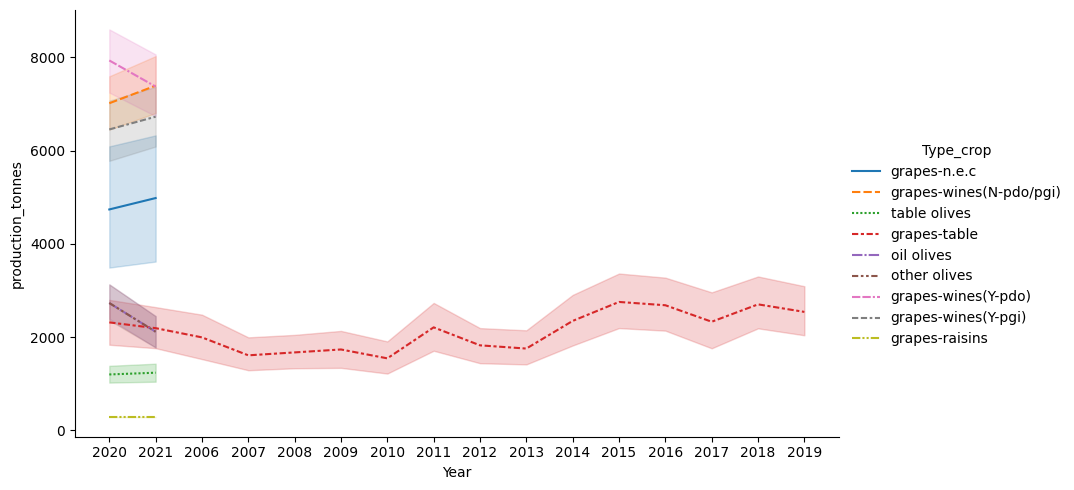

In [34]:
#Crop harvested by year

plotcrop10 = sns.relplot(kind='line', data=grapes_olives, x='Year', 
                         y='production_tonnes', hue='Type_crop', style='Type_crop', aspect=1.75)


In [29]:
#Fertilizers distributed by year

plotfertilizers10 = sns.relplot(kind='line', data=grapes_olives, x='Year', 
                         y='Fertilizers_tonnes', hue='Type_fertilizer', style='Type_fertilizer', aspect=1.75)

# Climate data analysis

|Param_Code|Param_Name|Resolution|Depth [m]|Units|
|:--------:|:--------:|:--------:|:-------:|:---:|
|GWETPROF|Profile Soil Moisture|0.5° x 0.625°|1.34 - 8.53|water-free [0], saturated soil[1]| 
|GWETTOP|Surface Soil Wetness|0.5° x 0.625°|0.00 - 0.05| water-free [0], saturated soil[1]|
|GWETROOT|Root Zone Soil Wetness|0.5° x 0.625°|0.10 - 1.00|water-free [0], saturated soil[1]|
|CLOUD_AMT|Cloud Amount|---|---|%|
|TS|Earth Skin Temperature|---|---|°C|
|PS|Surface Pressure|---|---|kPa|
|RH2M|Relative Humidity at 2 Meters|---|---|%|
|QV2M|Specific Humidity at 2 Meters|---|---|g/kg|
|PRECTOTCORR|Precipitation Corrected|---|---|mm/day|
|T2M_MAX|Temperature at 2 Meters Maximum|---|---|°C|
|T2M_MIN|Temperature at 2 Meters Minimum|---|---|°C|
|T2M_RANGE|Temperature at 2 Meters Range|---|---|°C|
|WS2M|Wind Speed at 2 Meters|---|---|m/s|


  

*Precipitation Corrected (PRECTOTCORR)- [The bias corrected average of total precipitation at the surface of the earth in water mass (includes water content in snow)]

*Source? https://power.larc.nasa.gov/#resources

In [35]:

fig, ax = plt.subplots(3, 2, sharex=True, figsize=(20,10))

fig.suptitle('Climate in Italy 2006 - 2021')

grapes_olives['Year'] = (grapes_olives['Year']).astype(str)

# relative_humidity
sns.lineplot(data= grapes_olives, x="Year", y="RH2M", ax=ax[0,0])

# precipitation
sns.lineplot(data= grapes_olives, x="Year", y="PRECTOTCORR", ax=ax[0,1])

# temp_max
sns.lineplot(data= grapes_olives, x="Year", y="T2M_MIN", ax=ax[1,0])

# temp_min
sns.lineplot(data= grapes_olives, x="Year", y="T2M_MAX", ax=ax[1,1])

# surface_soil_wetness
sns.lineplot(data= grapes_olives, x="Year", y="GWETTOP", ax=ax[2,0])

# root_zone_wetness
sns.lineplot(data= grapes_olives, x="Year", y="GWETROOT", ax=ax[2,1])


<AxesSubplot: xlabel='Year', ylabel='GWETROOT'>

In [36]:
grapes_olives

City                Type_crop  Year  \
430                Agrigento             grapes-n.e.c  2020   
431                Agrigento             grapes-n.e.c  2020   
432                Agrigento             grapes-n.e.c  2020   
433                Agrigento             grapes-n.e.c  2020   
434                Agrigento             grapes-n.e.c  2020   
...                      ...                      ...   ...   
51690  Monza e della Brianza  grapes-wines(N-pdo/pgi)  2021   
51691  Monza e della Brianza  grapes-wines(N-pdo/pgi)  2021   
51692  Monza e della Brianza  grapes-wines(N-pdo/pgi)  2021   
51693  Monza e della Brianza  grapes-wines(N-pdo/pgi)  2021   
51695  Monza e della Brianza  grapes-wines(N-pdo/pgi)  2021   

       production_tonnes  total_area_ha    PS    TS  QV2M  RH2M  WS2M  ...  \
430             12000.00        3150.00 96.89 17.49  8.36 70.30  2.51  ...   
431             12000.00        3150.00 96.89 17.49  8.36 70.30  2.51  ...   
432             12000.00        3150.00 96.89 17.49  8.36 70.30  2.51  ...   
433             12000.00        3150.00 96.89 17.49  8.36 70.30  2.51  ...   
434             12000.00        3150.00 96.89 17.49  8.36 70.30  2.51  ...   
...                  ...            ...   ...   ...   ...   ...   ...  ...   
51690              11.40           2.00 99.09 12.41  7.43 72.07  1.27  ...   
51691              11.40           2.00 99.09 12.41  7.43 72.07  1.27  ...   
51692              11.40           2.00 99.09 12.41  7.43 72.07  1.27  ...   
51693              11.40           2.00 99.09 12.41  7.43 72.07  1.27  ...   
51695              11.40           2.00 99.09 12.41  7.43 72.07  1.27  ...   

       T2M_MIN  GWETPROF  GWETROOT  CLOUD_AMT  T2M_RANGE  PRECTOTCORR  \
430       7.71      0.56      0.56      38.16      20.91         1.18   
431       7.71      0.56      0.56      38.16      20.91         1.18   
432       7.71      0.56      0.56      38.16      20.91         1.18   
433       7.71      0.56      0.56      38.16      20.91         1.18   
434       7.71      0.56      0.56      38.16      20.91         1.18   
...        ...       ...       ...        ...        ...          ...   
51690     3.30      0.73      0.71      58.20      20.79         2.46   
51691     3.30      0.73      0.71      58.20      20.79         2.46   
51692     3.30      0.73      0.71      58.20      20.79         2.46   
51693     3.30      0.73      0.71      58.20      20.79         2.46   
51695     3.30      0.73      0.71      58.20      20.79         2.46   

            Type_fertilizer  Fertilizers_tonnes   lat   lon  
430             peaty-amend               41.00 37.31 13.58  
431             peaty-amend               39.00 37.31 13.58  
432    nitrogen-phosphorous              918.00 37.31 13.58  
433                    urea              488.00 37.31 13.58  
434       ammonium sulphate              155.00 37.31 13.58  
...                     ...                 ...   ...   ...  
51690  phosphorus-potassium               10.00 45.58  9.27  
51691               organic               51.00 45.58  9.27  
51692                  urea             1421.00 45.58  9.27  
51693      organic-nitrogen               17.00 45.58  9.27  
51695     calcium cyanamide                0.00 45.58  9.27  

[13223 rows x 22 columns]

In [37]:
grapes_olives_model = grapes_olives.drop(columns =['Year','PS','TS','GWETTOP', 'QV2M','WS2M','T2M_RANGE','GWETPROF','CLOUD_AMT','PRECTOTCORR','lat', 'lon'  ])
grapes_olives_model

City                Type_crop  production_tonnes  \
430                Agrigento             grapes-n.e.c           12000.00   
431                Agrigento             grapes-n.e.c           12000.00   
432                Agrigento             grapes-n.e.c           12000.00   
433                Agrigento             grapes-n.e.c           12000.00   
434                Agrigento             grapes-n.e.c           12000.00   
...                      ...                      ...                ...   
51690  Monza e della Brianza  grapes-wines(N-pdo/pgi)              11.40   
51691  Monza e della Brianza  grapes-wines(N-pdo/pgi)              11.40   
51692  Monza e della Brianza  grapes-wines(N-pdo/pgi)              11.40   
51693  Monza e della Brianza  grapes-wines(N-pdo/pgi)              11.40   
51695  Monza e della Brianza  grapes-wines(N-pdo/pgi)              11.40   

       total_area_ha  RH2M  T2M_MAX  T2M_MIN  GWETROOT       Type_fertilizer  \
430          3150.00 70.30    28.62     7.71      0.56           peaty-amend   
431          3150.00 70.30    28.62     7.71      0.56           peaty-amend   
432          3150.00 70.30    28.62     7.71      0.56  nitrogen-phosphorous   
433          3150.00 70.30    28.62     7.71      0.56                  urea   
434          3150.00 70.30    28.62     7.71      0.56     ammonium sulphate   
...              ...   ...      ...      ...       ...                   ...   
51690           2.00 72.07    24.09     3.30      0.71  phosphorus-potassium   
51691           2.00 72.07    24.09     3.30      0.71               organic   
51692           2.00 72.07    24.09     3.30      0.71                  urea   
51693           2.00 72.07    24.09     3.30      0.71      organic-nitrogen   
51695           2.00 72.07    24.09     3.30      0.71     calcium cyanamide   

       Fertilizers_tonnes  
430                 41.00  
431                 39.00  
432                918.00  
433                488.00  
434                155.00  
...                   ...  
51690               10.00  
51691               51.00  
51692             1421.00  
51693               17.00  
51695                0.00  

[13223 rows x 10 columns]

# Pre-processing data for modelling 

In [39]:
from pycaret.regression import *

In [40]:
regr = setup(data = grapes_olives_model, target = 'production_tonnes', session_id = 123,
             categorical_features= ['City', 'Type_crop','Type_fertilizer'], normalize = True )

In [41]:
best = compare_models()

In [42]:
et = create_model('et')

# Tune model


In [43]:
tuned_et = tune_model(et)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
#evaluate_model(tuned_catboost)

In [44]:
plot_model(et) 

In [45]:
plot_model(et, plot = 'error')


In [46]:
plot_model(tuned_et, plot = 'parameter')


Parameters
bootstrap                         False
ccp_alpha                           0.0
criterion                 squared_error
max_depth                          None
max_features                        1.0
max_leaf_nodes                     None
max_samples                        None
min_impurity_decrease               0.0
min_samples_leaf                      1
min_samples_split                     2
min_weight_fraction_leaf            0.0
n_estimators                        100
n_jobs                               -1
oob_score                         False
random_state                        123
verbose                               0
warm_start                        False

# Predict Model

In [47]:
predictions = predict_model(et)

In [48]:
final_et = finalize_model(et)

In [49]:
print(final_et)


Pipeline(memory=Memory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['total_area_ha', 'RH2M', 'T2M_MAX',
                                             'T2M_MIN', 'GWETROOT',
                                             'Fertilizers_tonnes'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['City', 'Type_crop',
                                             'Type_fertilizer'],
                                    transformer=SimpleImputer(fill_value='constant',
                                                              strate...
                                             'Type_fertilizer'],
                                    transformer=LeaveOneOutEncoder(cols=['City',
                                                                         'Type_crop',
                                                                        

In [51]:
save_model(final_et, 'grapes_olives_et')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['total_area_ha', 'RH2M', 'T2M_MAX',
                                              'T2M_MIN', 'GWETROOT',
                                              'Fertilizers_tonnes'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['City', 'Type_crop',
                                              'Type_fertilizer'],
                                     transformer=SimpleImputer(fill_value='constant',
                                                               strate...
                                              'Type_fertilizer'],
                                     transformer=LeaveOneOutEncoder(cols=['City',
                                                                          'Type_crop',
                                                          

In [52]:
new_data = grapes_olives_model.copy()
new_data.drop(['production_tonnes'], axis=1, inplace=True)
predict_new = predict_model(final_et, data=new_data)
predict_new.head()


City  Type_crop  total_area_ha  RH2M  T2M_MAX  T2M_MIN  GWETROOT  \
0  2.40       0.55           2.90 -0.83     1.47     0.52     -0.84   
1  2.40       0.55           2.90 -0.83     1.47     0.52     -0.84   
2  2.40       0.55           2.90 -0.83     1.47     0.52     -0.84   
3  2.40       0.55           2.90 -0.83     1.47     0.52     -0.84   
4  2.40       0.55           2.90 -0.83     1.47     0.52     -0.84   

   Type_fertilizer  Fertilizers_tonnes  prediction_label  
0             1.02               -0.64          12080.20  
1             1.02               -0.64          12080.20  
2            -1.64                0.76          12055.70  
3             0.67                0.08          12055.70  
4            -1.51               -0.45          12055.70

In [53]:
new_data.Type_crop.unique()

array(['grapes-n.e.c', 'grapes-wines(N-pdo/pgi)', 'table olives',
       'grapes-table', 'oil olives', 'other olives',
       'grapes-wines(Y-pdo)', 'grapes-wines(Y-pgi)', 'grapes-raisins'],
      dtype=object)

In [54]:
new_data.City.unique()

array(['Agrigento', 'Alessandria', 'Ancona', 'Arezzo', 'Ascoli Piceno',
       'Asti', 'Avellino', 'Bari', 'Belluno', 'Benevento', 'Bergamo',
       'Biella', 'Bologna', 'Brescia', 'Brindisi', 'Caltanissetta',
       'Campobasso', 'Caserta', 'Catania', 'Catanzaro', 'Chieti',
       'Cosenza', 'Cremona', 'Crotone', 'Enna', 'Ferrara', 'Firenze',
       'Foggia', 'Frosinone', 'Genova', 'Grosseto', 'Imperia', 'Isernia',
       'La Spezia', 'Latina', 'Lecce', 'Livorno', 'Lodi', 'Lucca',
       'Macerata', 'Mantova', 'Matera', 'Messina', 'Milano', 'Modena',
       'Napoli', 'Novara', 'Nuoro', 'Oristano', 'Padova', 'Palermo',
       'Parma', 'Pavia', 'Perugia', 'Pesaro e Urbino', 'Pescara',
       'Piacenza', 'Pisa', 'Pistoia', 'Pordenone', 'Potenza', 'Prato',
       'Ragusa', 'Ravenna', 'Reggio di Calabria', "Reggio nell'Emilia",
       'Rieti', 'Rimini', 'Roma', 'Rovigo', 'Salerno', 'Sassari',
       'Savona', 'Siena', 'Siracusa', 'Taranto', 'Teramo', 'Terni',
       'Torino', 'Trapani', 'T

In [55]:
new_data.Type_fertilizer.unique()

array(['peaty-amend', 'nitrogen-phosphorous', 'urea', 'ammonium sulphate',
       'nitrogen-potassium', 'calcium cyanamide', 'phosphorus-potassium',
       'organic', 'organic-nitrogen'], dtype=object)

# References


http://dati.istat.it

https://maps.princeton.edu/catalog/stanford-mn871sp9778

https://www.crea.gov.it/documents/68457/0/ITACONTA+2020_ENG+DEF+xweb+%281%29.pdf/95c6b30a-1e18-8e94-d4ac-ce884aef76e8?t=1619527317576

https://seaborn.pydata.org/generated/seaborn.relplot.html

https://www.statisticshowto.com/variance-inflation-factor/

https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/

https://lost-stats.github.io/Presentation/Figures/heatmap_colored_correlation_matrix.html

https://plotly.com/python/box-plots/

https://pycaret.org/